# Cleaning the Dataset

Importing Pandas

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

Reading the CSV file through Pandas

In [36]:
dataset = pd.read_csv(
    "F:\Data_Science\winequalityN.csv",
    header = 0       
)

Filling missing data with mean value of the given column and replacing strings in Type with integers

In [37]:
dataset.fillna(dataset.mean(),inplace = True)

In [38]:
dataset.replace(
    to_replace = ["red","white"],
    value = [1,2],
    inplace = True
)

In [39]:
dataset

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,2,7.000000,0.270000,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,2,6.300000,0.300000,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,2,8.100000,0.280000,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,2,7.200000,0.230000,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,2,7.200000,0.230000,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
5,2,8.100000,0.280000,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
6,2,6.200000,0.320000,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.470000,9.6,6
7,2,7.000000,0.270000,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
8,2,6.300000,0.300000,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
9,2,8.100000,0.220000,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.450000,11.0,6


Plotting pH vs Alcohol content

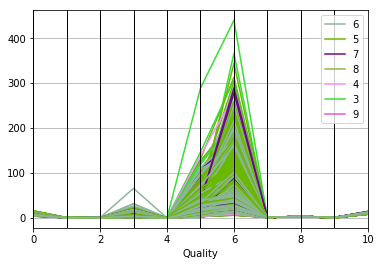

In [86]:
from pandas.plotting import parallel_coordinates

plot_feat = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
data_norm = pd.concat([dataset[plot_feat], dataset['quality']], axis=1)

parallel_coordinates(data_norm,class_column = 'quality',cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol'])
plt.legend()
plt.xscale("linear")
plt.xlabel("Quality")
plt.show()

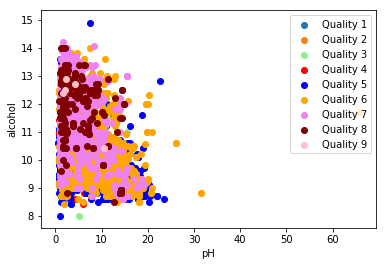

In [88]:
x = dataset.loc[:,'fixed acidity':'alcohol']
y = dataset['quality']

plt.scatter(x[y==1]['residual sugar'], x[y==1]['alcohol'], label='Quality 1')
plt.scatter(x[y==2]['residual sugar'], x[y==2]['alcohol'], label='Quality 2')
plt.scatter(x[y==3]['residual sugar'], x[y==3]['alcohol'], label='Quality 3', c='lightgreen')
plt.scatter(x[y==4]['residual sugar'], x[y==4]['alcohol'], label='Quality 4', c='red')
plt.scatter(x[y==5]['residual sugar'], x[y==5]['alcohol'], label='Quality 5', c='blue')
plt.scatter(x[y==6]['residual sugar'], x[y==6]['alcohol'], label='Quality 6', c='orange')
plt.scatter(x[y==7]['residual sugar'], x[y==7]['alcohol'], label='Quality 7', c='violet')
plt.scatter(x[y==8]['residual sugar'], x[y==8]['alcohol'], label='Quality 8', c='maroon')
plt.scatter(x[y==9]['residual sugar'], x[y==9]['alcohol'], label='Quality 9', c='pink')

plt.legend()
plt.xlabel('pH')
plt.ylabel('alcohol')

plt.show()

Normalizing Dataset for Model Usage

In [117]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(dataset)
datasetEdit = pd.DataFrame(np_scaled)

C:\Users\hp\Anaconda3\envs\TensorFlowEnv\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Building the ML Model

Importing necessary libraries

In [118]:
import tensorflow as tf
import numpy as np
import math

Bifurgating X and Y vectors

In [119]:
datasetEdit = np.exp(datasetEdit)

In [156]:

X = datasetEdit.iloc[:,0:dataset.shape[1]-1]
Y = dataset.iloc[:,dataset.shape[1]-1:dataset.shape[1]]

X_train = X.iloc[0:math.ceil(X.shape[0]*0.85),:]
X_train = X_train
Y_train = Y.iloc[0:math.ceil(Y.shape[0]*0.85),:]

Y_train = (Y_train)

X_test = X.iloc[math.ceil(X.shape[0]*0.85):X.shape[0],:]
X_test = X_test
Y_test = Y.iloc[math.ceil(Y.shape[0]*0.85):Y.shape[0],:]
Y_test = (Y_test)

In [157]:
print("Number of Training Examples: "+str(X_train.shape[1]))
print("Number of Features: "+str(X_train.shape[0]))
print("Shape of Input Training Vector X: "+str(X_train.shape))
print("Shape of Output Training Vector Y: "+str(Y_train.shape))

print("Number of Testing Examples: "+str(X_test.shape[0]))
print("Shape of Input Testing Vector X: "+str(X_test.shape))
print("Shape of Output Testing Vector Y: "+str(Y_test.shape))

Number of Training Examples: 12
Number of Features: 5523
Shape of Input Training Vector X: (5523, 12)
Shape of Output Training Vector Y: (5523, 1)
Number of Testing Examples: 974
Shape of Input Testing Vector X: (974, 12)
Shape of Output Testing Vector Y: (974, 1)


Defining and Initializing Data

In [158]:
def create(n_x,n_y):
    X = tf.placeholder(tf.float32,[None,n_x],name='X')
    Y = tf.placeholder(tf.float32,[None,n_y],name='Y')
    
    return X,Y

Parameter Initialization

In [178]:
def parameters():
    
    W1 = tf.get_variable("W1", [12, 10],dtype=tf.float32, initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1", [1, 10],dtype=tf.float32, initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [10, 6],dtype=tf.float32, initializer = tf.contrib.layers.xavier_initializer())
    b2 = tf.get_variable("b2", [1, 6],dtype=tf.float32, initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6, 3],dtype=tf.float32, initializer = tf.contrib.layers.xavier_initializer())
    b3 = tf.get_variable("b3", [1, 3],dtype=tf.float32, initializer = tf.zeros_initializer())
    W4 = tf.get_variable("W4", [3, 1],dtype=tf.float32, initializer = tf.contrib.layers.xavier_initializer())
    b4 = tf.get_variable("b4", [1, 1],dtype=tf.float32, initializer = tf.zeros_initializer())
    
    parSet = {
        "W1": W1,
        "b1": b1,
        "W2":W2,
        "b2":b2,
        "W3":W3,
        "b3":b3,
        "W4":W4,
        "b4":b4
    }
    
    return parSet

Forward Propagation Function

In [179]:
def forprop(X,parSet):
    
    Z1 = tf.add(tf.matmul(X,parSet['W1']), parSet['b1'])
    
    Z2 = tf.add(tf.matmul(Z1,parSet['W2']), parSet['b2'])
    #A2 = tf.nn.leaky_relu(Z2)
    
    Z3 = tf.add(tf.matmul(Z2,parSet['W3']), parSet['b3'])
    A3 = tf.nn.leaky_relu(Z3)
    
    Z4 = tf.add(tf.matmul(A3,parSet['W4']),parSet['b4'])
    A4 = tf.nn.sigmoid(Z4)
    
    A4 = tf.scalar_mul(10,A4)
    
    return A4

Cost Computation

In [180]:
def cost_value(Z3,Y):
    
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.losses.mean_squared_error(predictions=logits,labels=labels))
    
    return cost

Gradient Descent and Model Definition

In [181]:
def model(X_train,Y_train,X_test,Y_test,learning_rate=0.001,epoches=2000,batch_size=32):
    
    tf.reset_default_graph()
    
    (m,n_x) = X_train.shape
    n_y = Y_train.shape[1]
    
    costs = []
    accuracy = []
    X, Y = create(n_x, n_y)
    parSet = parameters()
    Z3 = forprop(X, parSet)
    cost = cost_value(Z3, Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(epoches):
            
            epoch_cost = 0
            batches = int(m/batch_size)
            
            for j in range(batches):
                
                start = j*batch_size
                end = (j+1)*batch_size
                
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: X_train.iloc[start:end,:], Y: Y_train.iloc[start:end,:]})
                
                epoch_cost += minibatch_cost / batches
                
            if epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if epoch % 5 == 0:
                costs.append(epoch_cost)
                    
        print ("Cost after epoch 2000: %f" % (epoch_cost))
                    
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        parSet = sess.run(parSet)
        correct_prediction = tf.equal(tf.round(Z3),Y)
        
        accuracy = tf.scalar_mul(100,tf.reduce_mean(tf.cast(correct_prediction, "float")))
        print("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parSet

Cost after epoch 0: 4.722939
Cost after epoch 100: 0.564813
Cost after epoch 200: 0.531475
Cost after epoch 300: 0.526878
Cost after epoch 400: 0.526470
Cost after epoch 500: 0.524345
Cost after epoch 600: 0.523558
Cost after epoch 700: 0.524059
Cost after epoch 800: 0.523091
Cost after epoch 900: 0.522518
Cost after epoch 1000: 0.521811
Cost after epoch 1100: 0.520936
Cost after epoch 1200: 0.521140
Cost after epoch 1300: 0.519553
Cost after epoch 1400: 0.519163
Cost after epoch 1500: 0.520200
Cost after epoch 1600: 0.519290
Cost after epoch 1700: 0.518920
Cost after epoch 1800: 0.517376
Cost after epoch 1900: 0.517854
Cost after epoch 2000: 0.517537


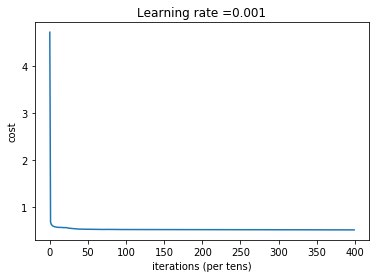

Train Accuracy: 52.380955
Test Accuracy: 59.548252


In [182]:
parameters = model(X_train, Y_train, X_test, Y_test)